# Meteorological data for SnowEx 2020
---
*J. Michelle Hu  
University of Utah  
August 2024*  


Items of note to plot:
- freezing depth
- time series of soil moisture, soil temperature
- precipitation events
- overlying temperature conditions
>> figure out if any of the data is not useful and should be dropped

In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [2]:
sns.set_palette(sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False))

In [3]:

# start = datetime(2019, 11, 5)
# end = datetime(2019, 11, 6)

# start = datetime(2020, 2, 7)
# end = datetime(2020, 2, 10)

start = datetime(2019, 10, 1)
end = datetime(2020, 4, 1)

# start = datetime(2020, 1, 1)
# end = datetime(2020, 6, 1)
start, end

(datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0))

In [10]:
# Read in and clean up PoR met data
df = pd.read_csv('../../../metloom-tutorial/n5eil01u.ecs.nsidc.org/SNOWEX/SNEX_Met.001/2017.06.21/SNEX_Met_GMSP2_final_output.csv')
# df = pd.read_csv('./cache/SNEX_Met_GMSP2_final_output.csv') # getting access denied
df['datetime'] = pd.to_datetime(df['TIMESTAMP'])
df = df.drop(columns=['TIMESTAMP']).set_index('datetime')
variables = ['AirTC_20ft_Avg', 'AirTC_10ft_Avg',
             'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg', 
             'TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 
             'SnowDepthFilter(m)']

drop = [col for col in df.columns if col not in variables]
df.drop(columns=drop, inplace=True)
# Clean the data a bit
# Replace no data values with nan
ndv = -9999
df[df==ndv] = np.nan
filtered_df = df.loc[(df.index >= start)
                     & (df.index < end)]
filtered_df.head()

,HTTP Basic: Access denied.


### Set some defaults

In [5]:
timeperiod = 'h'
figsize = (12, 4)

### Plot air temperature

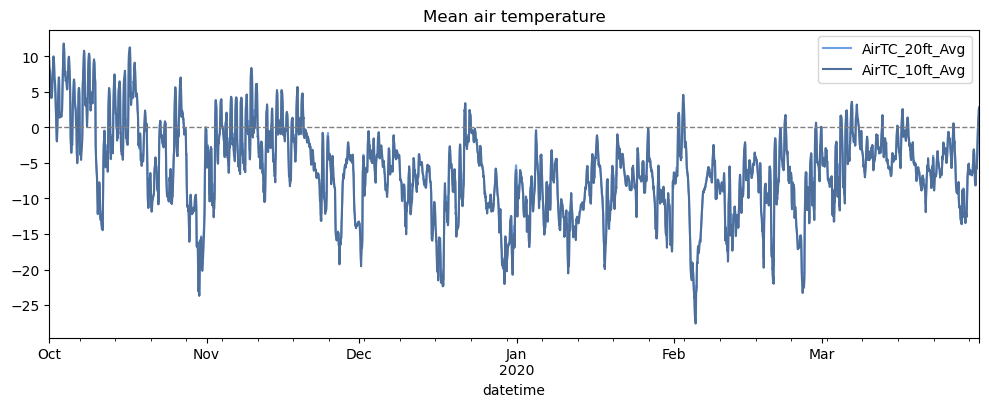

In [6]:
for var in ['AirTC_20ft_Avg', 'AirTC_10ft_Avg']:
    # print(var)
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
plt.title('Mean air temperature')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

### Plot soil temperature

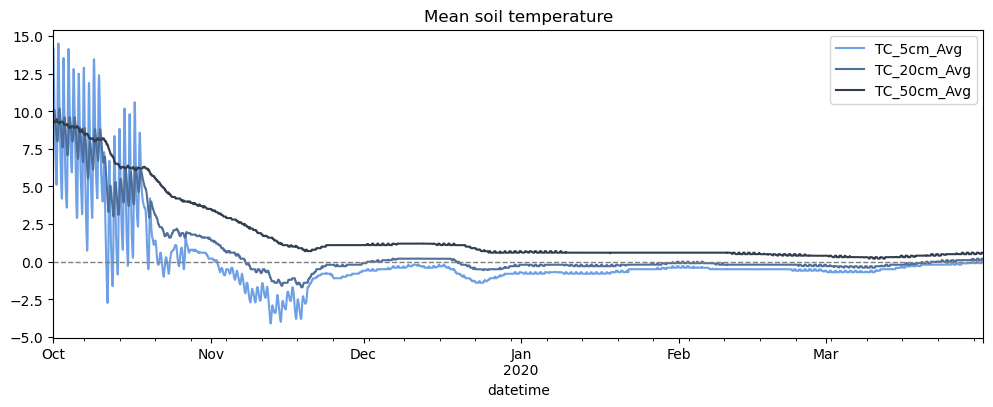

In [7]:
for var in ['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg']:
    # print(var)
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
plt.title('Mean soil temperature')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

### Plot precipitation events

### Plot soil moisture

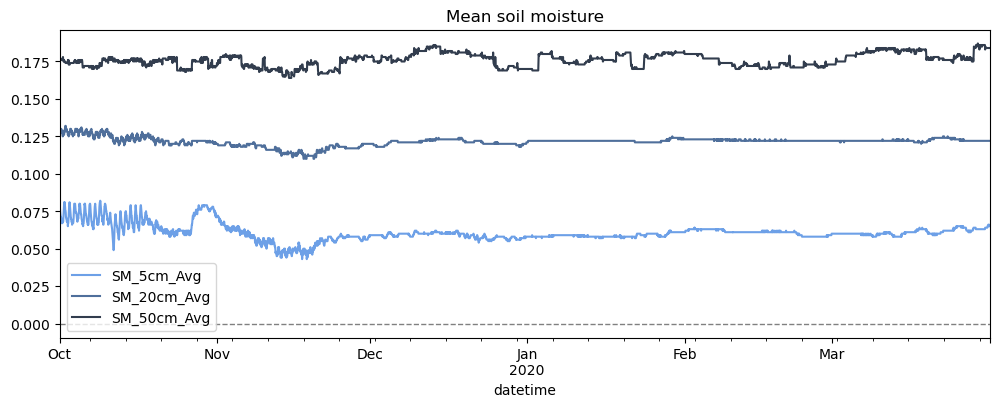

In [8]:
for var in ['SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg']:
    # print(var)
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
plt.title('Mean soil moisture')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

TODO:
- Rename var names
- plot the time period mean, min, max (p16, p84)

In [15]:
# !python3 -m pip install metloom
# from metloom.pointdata import SnowExMet
# from metloom.variables import SnowExVariables
# for f in SnowExMet.ALLOWED_STATIONS:
#     print(f)
# variables = [SnowExMet.ALLOWED_VARIABLES.PRECIPITATION,
#              SnowExMet.ALLOWED_VARIABLES.SNOWDEPTH,
#              SnowExMet.ALLOWED_VARIABLES.SWE,
#              SnowExMet.ALLOWED_VARIABLES.TEMP_10FT,
#              SnowExMet.ALLOWED_VARIABLES.TEMP_20FT,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND5CM,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND20CM,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND50CM]

In [16]:
# # Grand Mesa Study Plot
# gmsp = SnowExMet('GMSP')
# df_gmsp = gmsp.get_hourly_data(datetime.timestamp(start), datetime.timestamp(end), [SnowExVariables.SNOWDEPTH])
# df_gmsp

In [17]:
# roi_fn = "/home/jovyan/shared-public/swesarr_project/base-layers/swesarr-roi.shp"
# poly = gpd.read_file(roi_fn)
# poly